<div style="max-width: 1350px; margin: 15px auto; padding: 15px; background-color: #A4D8E1; font-size: 13px; text-align: left; color: black; border-radius: 15px 20px;">


<h3 align="left"><font color=white></font>Problem Statement:</h3><!--3E362E,865D36--> 
TThis project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, 
the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model 
to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.
</div>

<div style="max-width: 1350px; margin: 15px auto; padding: 15px; background-color: #A4D8E1; font-size: 13px; text-align: left; color: black; border-radius: 15px 20px;">

<h2 align="center" style="font-weight:bold;"><font color=black>Dataset Description:</font></h2>
The dataset used for model building contained 11142  observations of 10 variables. The data contains the following information:

| Variable | Description |
| --- | --- |
|step|maps a unit of time in the real world. In this case 1 step is 1 hour of time.|
|type|CASH-IN = Refers to depositing cash into an account, typically adding funds. CASH-OUT = Refers to withdrawing cash from an account, usually removing funds, DEBIT = This can have two meanings: 1. It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense. 2. In accounting, it represents an entry that reduces assets or increases liabilities. PAYMENT = Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of debt.TRANSFER = Refers to moving money from one account to another, often between accounts held by the same person or entity.|
|amount|amount of the transaction in local currency.|
|nameOrig|customer who started the transaction|
|oldbalanceOrg|initial balance before the transaction.|
|newbalanceOrig|new balance after the transaction.|
|nameDest|customer who is the recipient of the transaction|
|oldbalanceDest|initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).|
|newbalanceDest|new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).|
|isFraud|This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.|


</div>

In [1]:
# import the necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the data set
data = pd.read_csv(r"F:\Capston Project\Fraud_Analysis_Dataset.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [3]:
# Rename the column header

data.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]
data


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [4]:
#Data Verification

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   step                                 11142 non-null  int64  
 1   type                                 11142 non-null  object 
 2   amount                               11142 non-null  float64
 3   customer_starting_transaction        11142 non-null  object 
 4   bal_before_transaction               11142 non-null  float64
 5   bal_after_transaction                11142 non-null  float64
 6   recipient_of_transaction             11142 non-null  object 
 7   bal_of_recepient_before_transaction  11142 non-null  float64
 8   bal_of_receipient_after_transaction  11142 non-null  float64
 9   fraud_transaction                    11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [5]:
# statistical analysis of the data
data.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [6]:
data.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,11142,11142,11142,11142,11142,11142,11142
mean,8,213191,924117,824957,888354,1103211,0
std,16,760065,2143004,2089894,2601375,2982447,0
min,1,2,0,0,0,0,0
25%,2,4946,427,0,0,0,0
50%,6,16761,28169,4420,0,0,0
75%,7,154336,304085,111412,271155,318637,0
max,95,10000000,19900000,13000000,33000000,34600000,1


In [7]:
#Missing values
data.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
dtype: int64

In [8]:
#Duplicate value
data.duplicated().sum()

0

In [9]:
data.shape

(11142, 10)

### We have 11,142 rows and 10 columns in the dataset

## EXPLORATORY DATA ANALYSIS

Univariate Analysis | 
Bivariate Analysis | 
Multivariate Analysis |
Correlation

### Univariate Analysis

 It's looks at just one variable to see how it behaves. It uses simple statistics like averages and graphs to understand things like its typical value and how spread out the data is. It’s a way to get a clear picture of that one variable on its own.

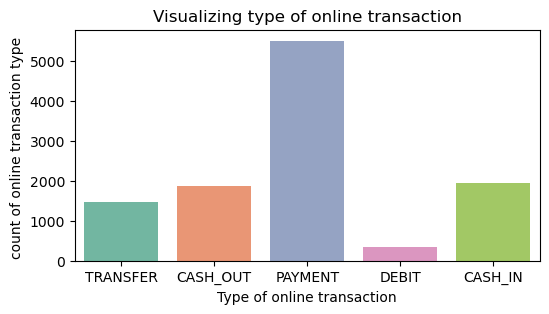

In [10]:
#visualize type of online transaction
plt.figure(figsize=(6,3))
sns.countplot (x="type", data= data, palette="Set2")
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")
plt.show()

##### From the chart, it is seen that cash_out and payment  is the most common type of online transaction that customers use.

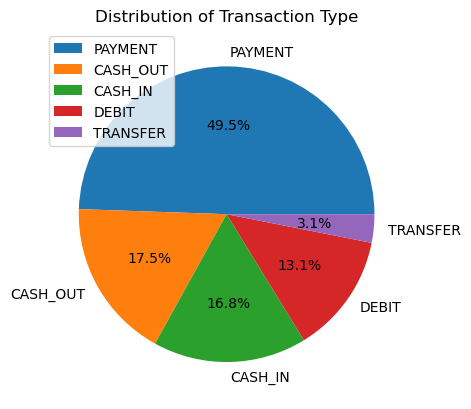

In [11]:
x = np.array([data['type'].value_counts()[0].sum(), data['type'].value_counts()[1].sum(), data['type'].value_counts()[2].sum(), data['type'].value_counts()[3].sum(),data['type'].value_counts()[4].sum(),])
mylabels = ['PAYMENT','CASH_OUT','CASH_IN','DEBIT','TRANSFER']

plt.pie(x, labels = mylabels, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")

plt.legend(loc="upper left")
plt.show()

In [12]:
data.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

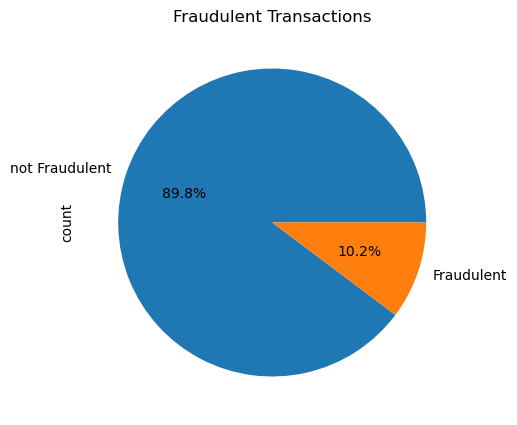

In [13]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
data["fraud_transaction_label"] = data["fraud_transaction"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
data.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')


##### From this chart, its shows that most of transactions does is not fraudulent. Also the dataset is imbalance.

In [14]:
#Find the value_counts of the target feature.
data.fraud_transaction.value_counts()


fraud_transaction
0    10000
1     1142
Name: count, dtype: int64

<Axes: xlabel='fraud_transaction', ylabel='count'>

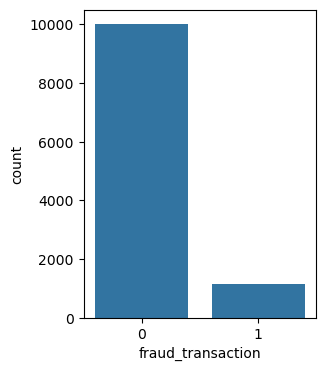

In [15]:
# Visualize tareget feature
plt.figure(figsize = (3,4))
sns.countplot(x='fraud_transaction', data=data,)

<Axes: xlabel='step', ylabel='Density'>

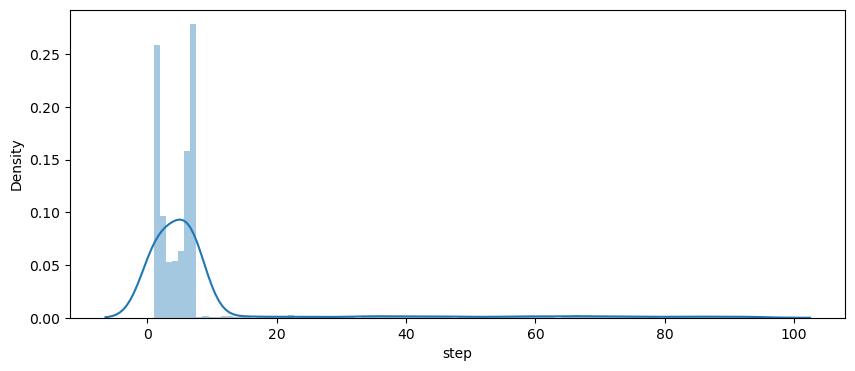

In [16]:
# Visualization for step column and indicates the distribution of the step column

plt.figure(figsize=(10,4))
sns.distplot(data['step'],bins=100)

From this visual indication of how many transactions occur at each step. Taller bars indicate more frequent step values, while shorter bars show less frequent values.

### Bivariate Analysis

It is examines the relationship between two variables. It helps to see how they interact or influence each other, often using methods like scatter plots or correlation coefficients. This type of analysis can reveal patterns, trends, and associations between the two variables.

<Axes: xlabel='type', ylabel='amount'>

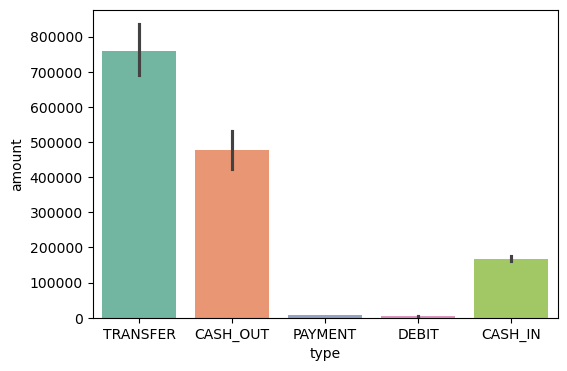

In [17]:
# Visualize how much amount is involved in each type of transaction.
plt.figure(figsize = (6,4))
sns.barplot(x='type',y='amount',data=data, palette="Set2")

##### In this chart,  'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions

<Figure size 600x400 with 0 Axes>

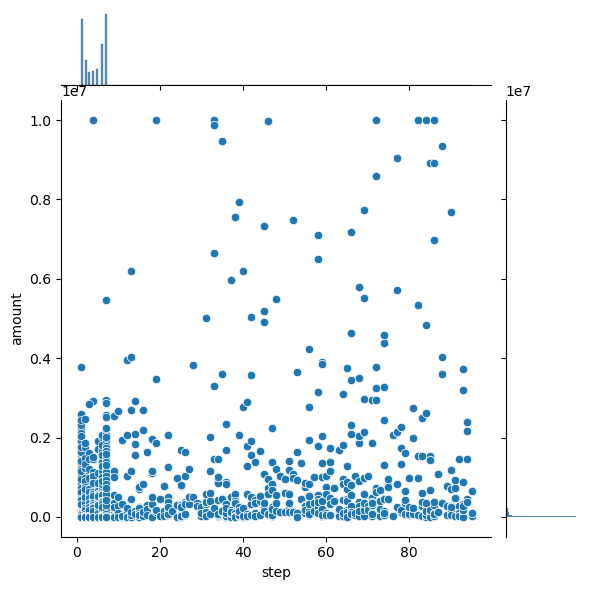

In [18]:
# Visualization between step and amount
plt.figure(figsize = (6,4))
sns.jointplot(x='step',y='amount',data=data)

Text(0, 0.5, 'fraud_transaction')

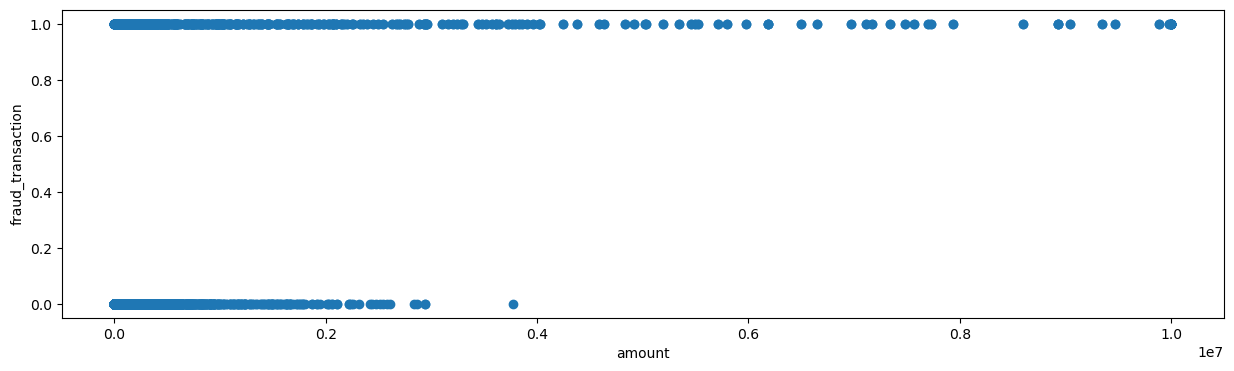

In [19]:
# Visualization between amount and fraud_transaction
plt.figure(figsize=(15,4))
plt.scatter(x='amount',y='fraud_transaction',data=data)
plt.xlabel('amount')
plt.ylabel('fraud_transaction')

Text(0, 0.5, 'fraud_transaction')

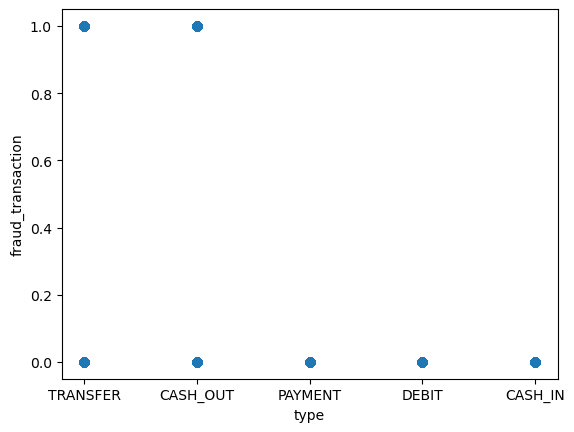

In [20]:
# Visualization between type and isfraud_label

plt.scatter(x='type',y='fraud_transaction',data=data)
plt.xlabel('type')
plt.ylabel('fraud_transaction')

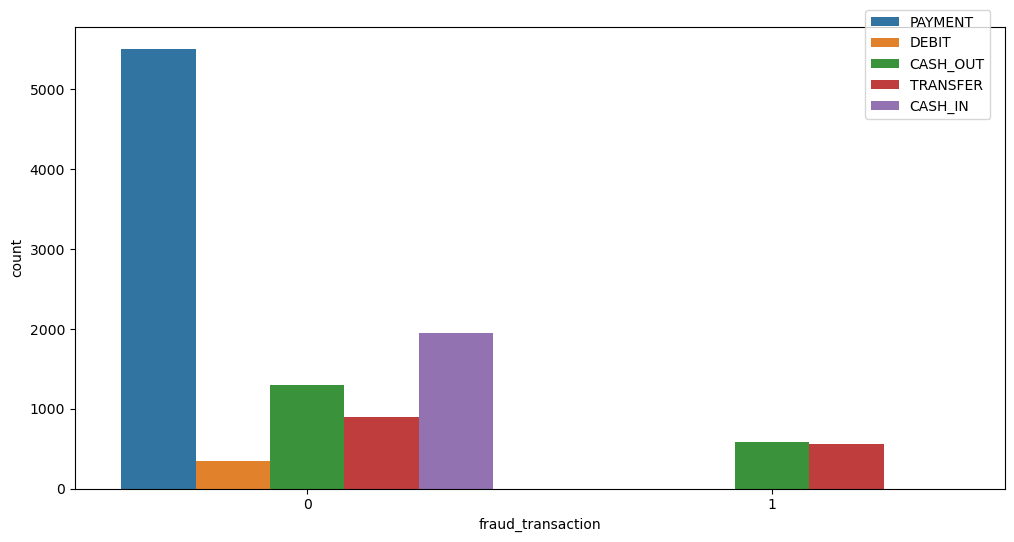

In [21]:
# Visualization between type and isfraud_label

plt.figure(figsize=(12,6))
sns.countplot(x='fraud_transaction',data=data,hue='type')
plt.legend(loc=[0.85,0.8])

##### Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.

### Multivariate Analysis

 It is explores the relationships between three or more variables simultaneously. It helps to understand how multiple factors interact with each other and can reveal complex patterns and insights in the data. Common methods include multiple regression and factor analysis.

<Axes: xlabel='type', ylabel='step'>

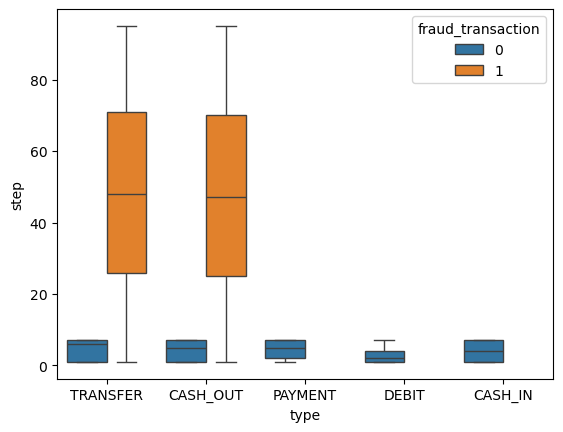

In [22]:
# Visualizing btw step,type and isFraud

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction", data= data)

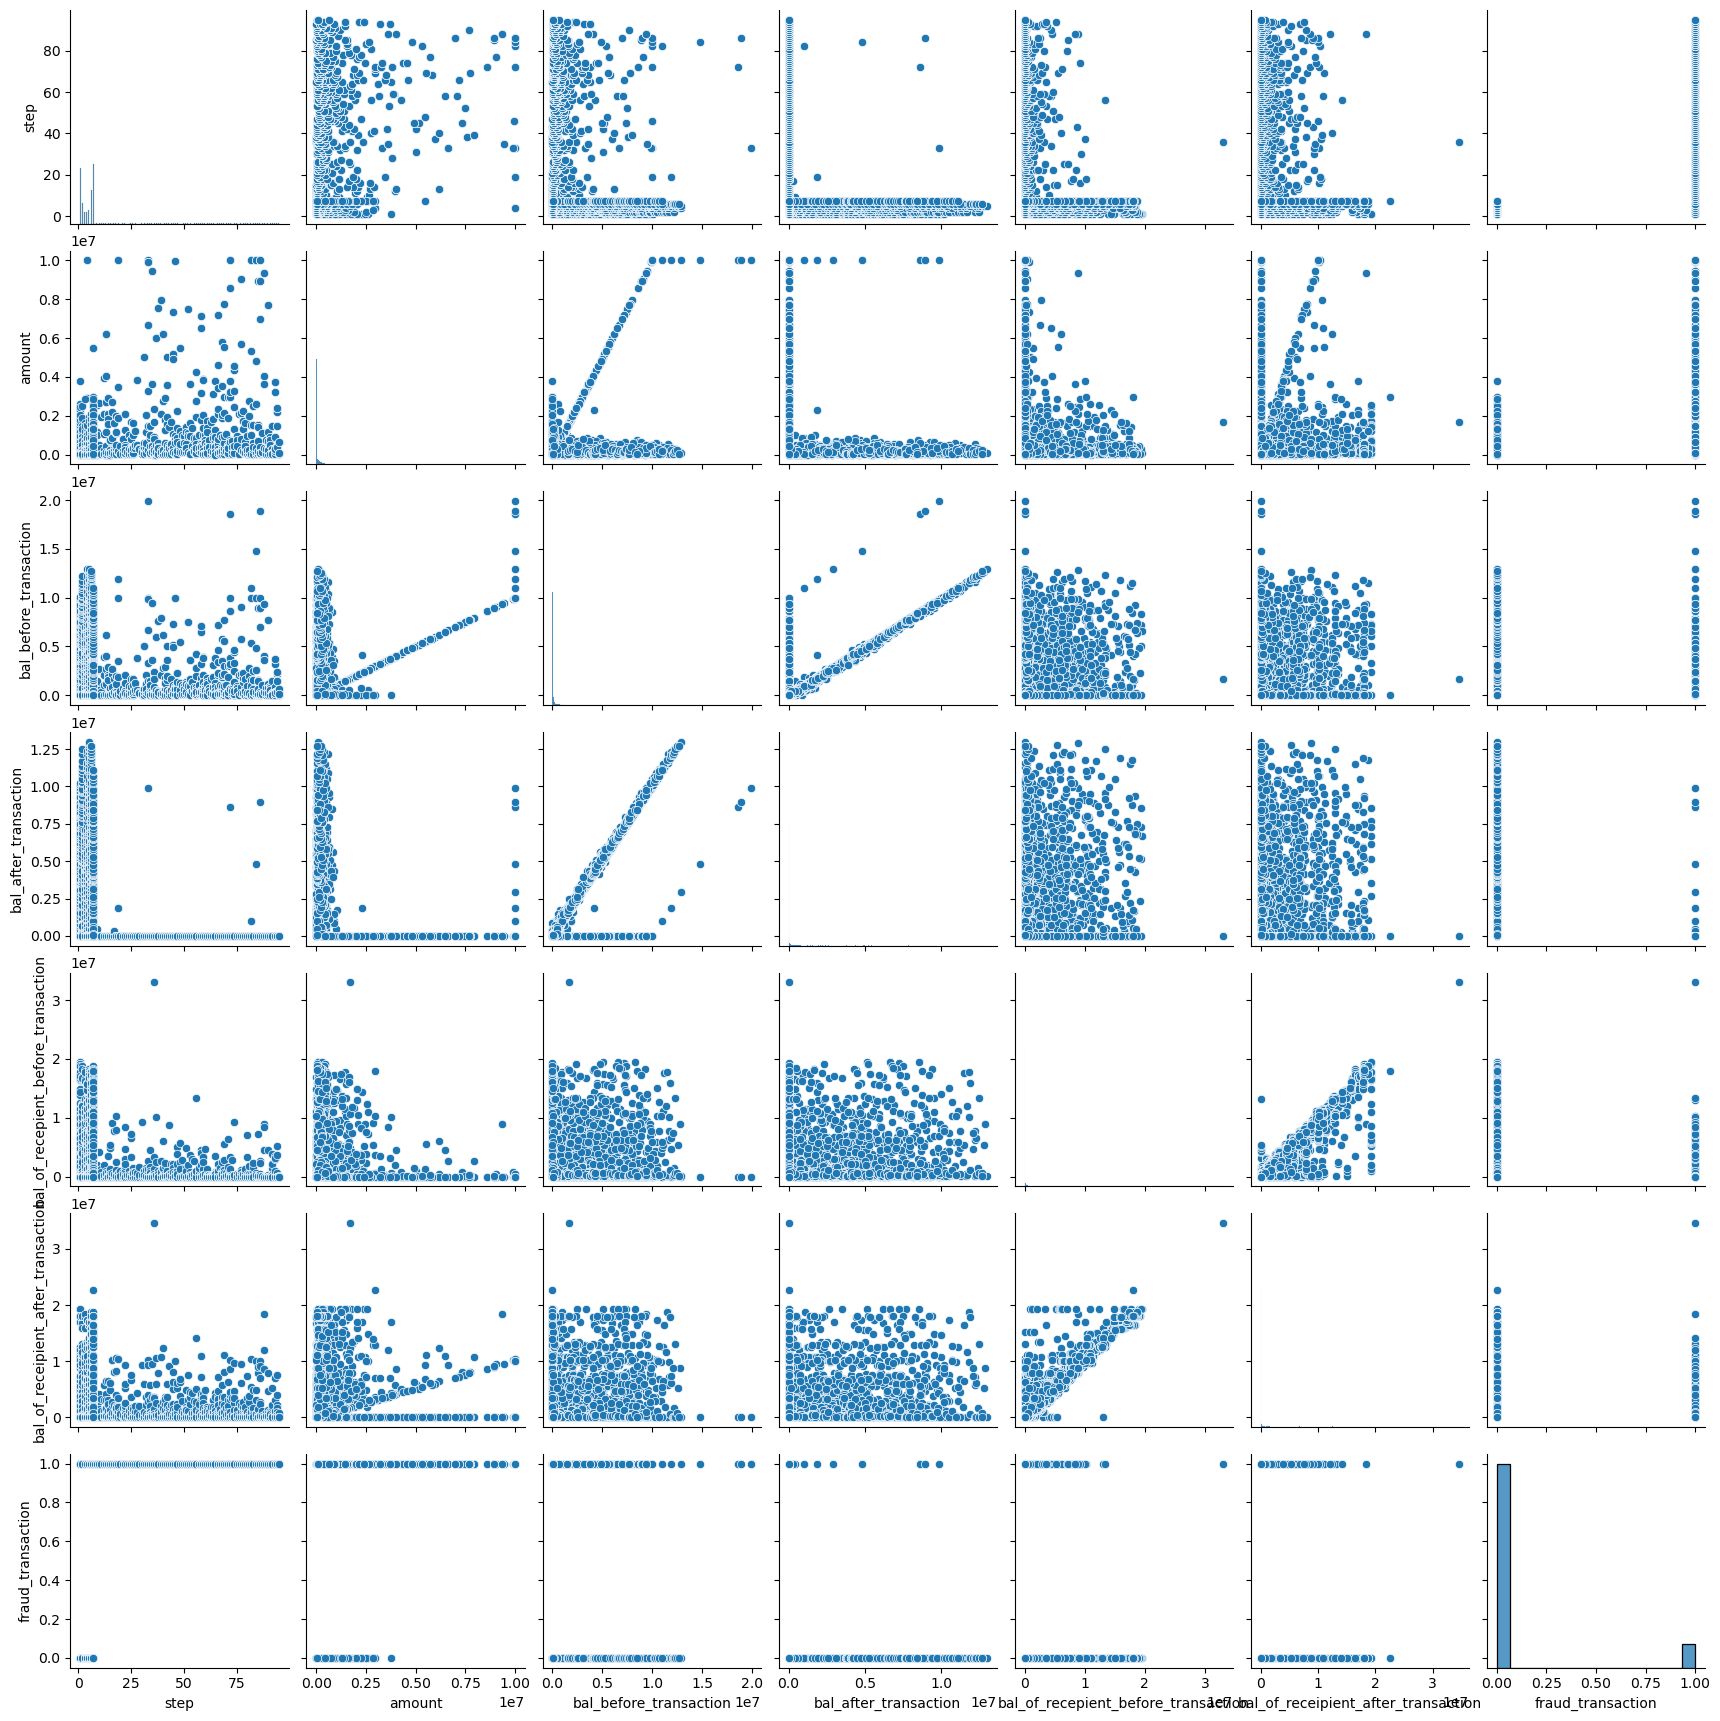

In [28]:
sns.pairplot(data)

### Feature Engineering

Deal with the categorical features and Converting the `type` categorical variable into `numerical` by mapping.

In [23]:
categorical_features = ['type']  
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

In [24]:
# Drop unnecessery feaure.
data = data.drop(['customer_starting_transaction','recipient_of_transaction','fraud_transaction_label'],axis=1)

Text(0.5, 1.0, 'Correlation of Numerical Features with isFraud')

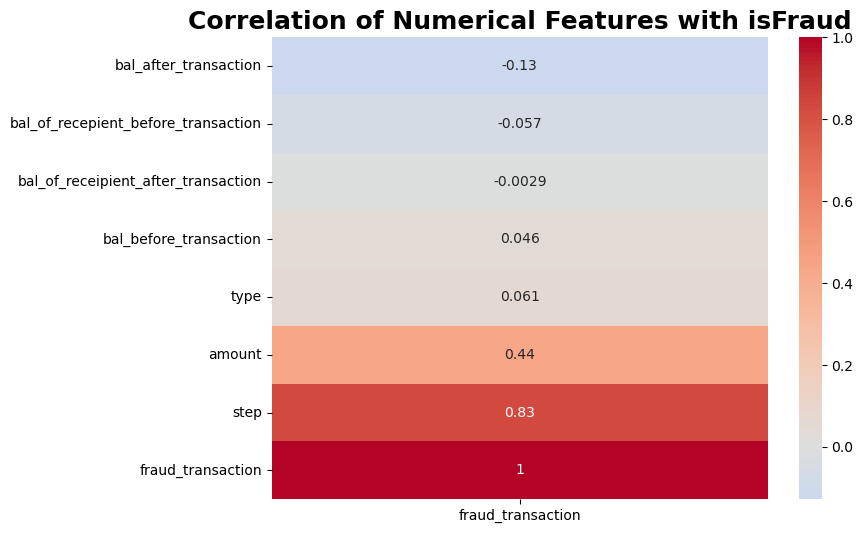

In [25]:
# Correlation of numerical features with fetal_health
correlation_matrix = data.corr()['fraud_transaction']

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True,cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with isFraud",
                    fontsize=18,
                    fontweight="bold")

We can observe that, there is a very high bias towards `Not Fraud` type of transactions. We need to resample the data inorder to reduce the bias. Let's do undersampling.

In [26]:
# Feature selection with K-Best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = data[['step','type','amount','bal_before_transaction','bal_after_transaction','bal_of_recepient_before_transaction','bal_of_receipient_after_transaction']]
Y = data['fraud_transaction']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [27]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                               Feature         Score
0                                 step  25047.435691
2                               amount   2607.177174
4                bal_after_transaction    185.299302
1                                 type     40.979041
5  bal_of_recepient_before_transaction     35.770801
3               bal_before_transaction     24.082889
6  bal_of_receipient_after_transaction      0.091347


Text(0.5, 1.0, 'Feature Importance')

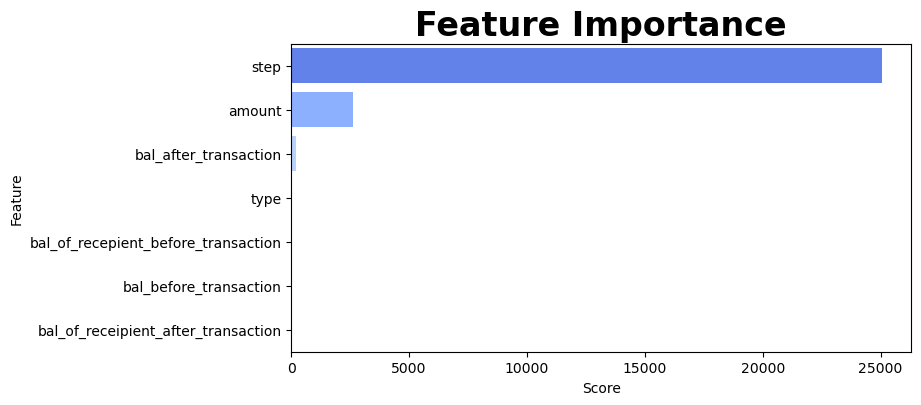

In [28]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

## Standardization

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000., 40000000.]),
 [Text(0, -5000000.0, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 5000000.0, '0.5'),
  Text(0, 10000000.0, '1.0'),
  Text(0, 15000000.0, '1.5'),
  Text(0, 20000000.0, '2.0'),
  Text(0, 25000000.0, '2.5'),
  Text(0, 30000000.0, '3.0'),
  Text(0, 35000000.0, '3.5'),
  Text(0, 40000000.0, '4.0')])

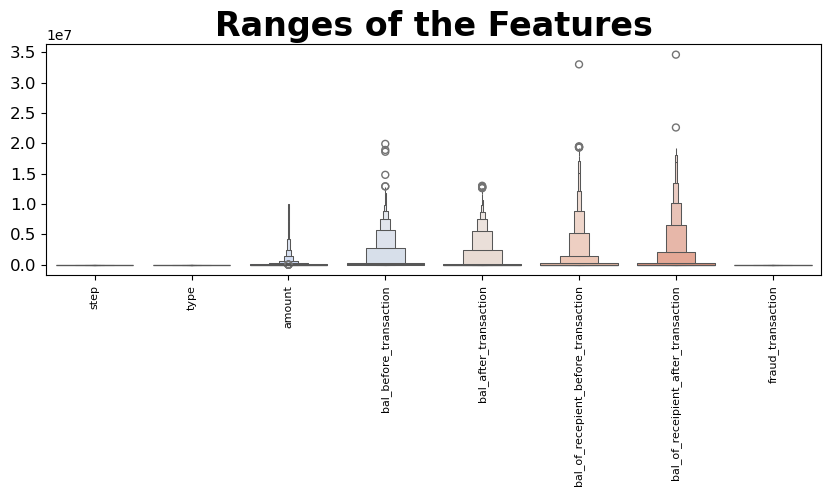

In [29]:
# Visualize the range of features before scaling and standardizing 
plt.figure(figsize=(10, 3))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

## Model Selection, Training and Validation

In [30]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["fraud_transaction"], axis=1)
y = data["fraud_transaction"]

In [31]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled dataset shape:", Counter(y_resampled))

Resampled dataset shape: Counter({1: 10000, 0: 10000})


In [32]:
# Set up a standard scaler for the features
from sklearn.preprocessing import StandardScaler
col_names = list(X_resampled.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)


In [33]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,1.071362e-16,1.000045,-0.480349,-0.418108,-0.169147,-0.106907,5.370241
type,11142.0,-7.652587e-17,1.000045,-1.654697,-0.915724,0.562222,0.562222,1.301194
amount,11142.0,-6.122070e-17,1.000045,-0.280501,-0.273995,-0.258450,-0.077438,12.876856
bal_before_transaction,11142.0,3.571207e-17,1.000045,-0.431244,-0.431045,-0.418099,-0.289341,8.855201
bal_after_transaction,11142.0,1.275431e-18,1.000045,-0.394754,-0.394754,-0.392639,-0.341442,5.825936
bal_of_recepient_before_transaction,11142.0,1.402974e-17,1.000045,-0.341509,-0.341509,-0.341509,-0.237269,12.344655
bal_of_receipient_after_transaction,11142.0,-6.249613e-17,1.000045,-0.369918,-0.369918,-0.369918,-0.263076,11.231814


In [34]:
# Split the datasets into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df,y, test_size=0.3, random_state=42)

In [35]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((7799, 7), (3343, 7), (7799,), (3343,))

In [36]:
# Initialize models
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [37]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          SVC()
        ]

In [38]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (4,2))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [39]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9871373018247084 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       1.00      0.88      0.93       347

    accuracy                           0.99      3343
   macro avg       0.99      0.94      0.96      3343
weighted avg       0.99      0.99      0.99      3343



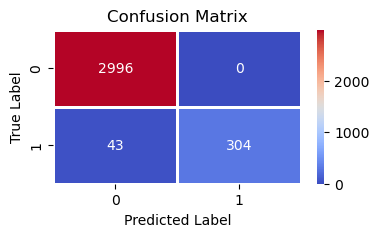


For RandomForestClassifier, Accuracy score is 0.996111277295842 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       1.00      0.96      0.98       347

    accuracy                           1.00      3343
   macro avg       1.00      0.98      0.99      3343
weighted avg       1.00      1.00      1.00      3343



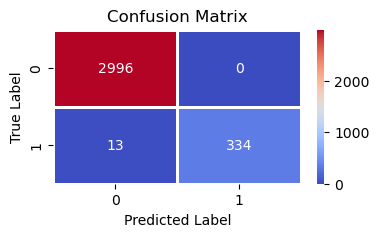


For GradientBoostingClassifier, Accuracy score is 0.9958121447801376 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       1.00      0.96      0.98       347

    accuracy                           1.00      3343
   macro avg       1.00      0.98      0.99      3343
weighted avg       1.00      1.00      1.00      3343



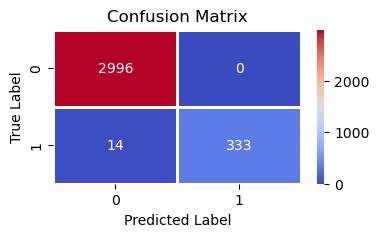


For SVC, Accuracy score is 0.9874364343404128 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       1.00      0.88      0.94       347

    accuracy                           0.99      3343
   macro avg       0.99      0.94      0.96      3343
weighted avg       0.99      0.99      0.99      3343



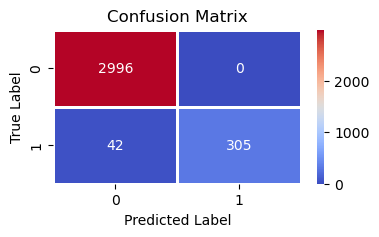

In [40]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

In [41]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
LR_scores = cross_validate(LogisticRegression(), X_test, y_test, scoring='recall_macro')
GBC_scores = cross_validate(GradientBoostingClassifier(), X_test, y_test, scoring='recall_macro')
RF_scores = cross_validate(RandomForestClassifier(), X_test, y_test, scoring='recall_macro')
SVM_scores = cross_validate(SVC(), X_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Logistic Regression Recall Cross-Validation:', np.mean(LR_scores['test_score']))
print('GradientBoostingClassifier Recall Cross-Validation:', np.mean(GBC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))
print('Support Vector Machine Recall Cross-Validation:', np.mean(SVM_scores['test_score']))

Logistic Regression Recall Cross-Validation: 0.9308695652173913
GradientBoostingClassifier Recall Cross-Validation: 0.9726293995859214
Random Forest Recall Cross-Validation: 0.9740579710144928
Support Vector Machine Recall Cross-Validation: 0.935217391304348


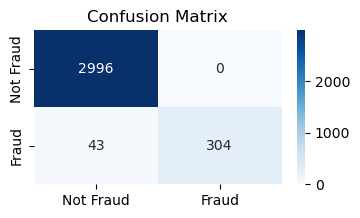

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       1.00      0.88      0.93       347

    accuracy                           0.99      3343
   macro avg       0.99      0.94      0.96      3343
weighted avg       0.99      0.99      0.99      3343

Accuracy Score for Logistic Regression: 0.9871


In [42]:
# Evaluate the final model
best_model = LogisticRegression()  
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score for Logistic Regression: {accuracy:.4f}')


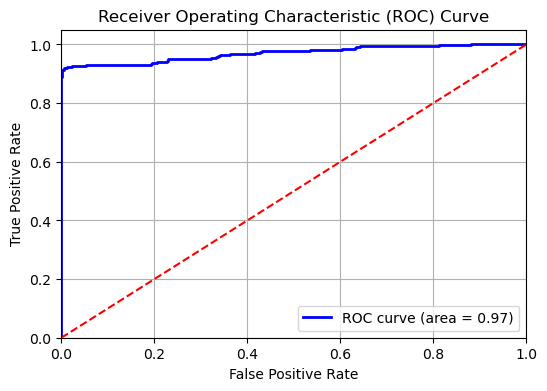

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Result

### The Logistic Regression model with default parameters yields 98.71% accuracy on training data.

Precision Score: This means that 100% of all the things we predicted came true. that is 100% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 88% of it to be true.



#### Conclusion
Upon training and evaluating our classification model, we found that the Logistic Regression model performed the best.

Therefore, Logistic Regression performs best with recall cross-validation accuracy of 93% which is important for our problem statement where false negative is our priority.


In [61]:
# Define costs 
cost_per_false_negative = 1000  # Cost of letting a fraudulent transaction through
cost_per_false_positive = 100  # Cost of wrongly classifying a legitimate transaction as fraudulent
revenue_tp = 500  # Example revenue per true positive
revenue_tn = 50   # Example revenue per true negative

# Calculate financial impact
def calculate_impact(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # loss_due_to_false_negatives = fn * cost_per_false_negative
    # loss_due_to_false_positives = fp * cost_per_false_positive
    
    # total_loss = loss_due_to_false_negatives + loss_due_to_false_positives
    # return total_loss

    total_revenue = (tp * revenue_tp) + (tn * revenue_tn)
    total_loss = (fp * cost_per_false_positive) + (fn * cost_per_false_negative)
    profit = total_revenue - total_loss

    return total_revenue, total_loss, profit

# Calculate impact for each model
for model in models:
    y_pred = model.predict(X_test)
    total_revenue, total_loss, profit = calculate_impact(y_test, y_pred)
    print(f'Financial Impact for {model}:')
    print(f'  Total Revenue: ₹{total_revenue}')
    print(f'  Total loss: ₹{total_loss}')
    print(f'  Profit: ₹{profit}')

Financial Impact for LogisticRegression():
  Total Revenue: ₹301800
  Total loss: ₹43000
  Profit: ₹258800
Financial Impact for RandomForestClassifier():
  Total Revenue: ₹316300
  Total loss: ₹14000
  Profit: ₹302300
Financial Impact for GradientBoostingClassifier():
  Total Revenue: ₹316300
  Total loss: ₹14000
  Profit: ₹302300
Financial Impact for SVC():
  Total Revenue: ₹302300
  Total loss: ₹42000
  Profit: ₹260300


In [62]:
X_train.columns

Index(['step', 'type', 'amount', 'bal_before_transaction',
       'bal_after_transaction', 'bal_of_recepient_before_transaction',
       'bal_of_receipient_after_transaction'],
      dtype='object')

### Prediction

In [63]:
features = pd.DataFrame({
        'step' : [1],
        'type' : [0],
        'amount' : [500],
        'bal_before_transaction' : [1000],
       'bal_after_transaction' : [500], 
       'bal_of_recepient_before_transaction' : [0],
       'bal_of_receipient_after_transaction' : [0]
})

col_names = list(features.columns)
s_scaler = StandardScaler()

X_dframe = s_scaler.fit_transform(features)
X_dframe = pd.DataFrame(X_dframe, columns=col_names)

print(model.predict(features))

[1]


In [64]:
import joblib

# Assuming `model` is your trained model and `s_scaler` is your scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(s_scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoder.pkl')


['label_encoder.pkl']